In [18]:
import sys, os
sys.path.append(os.path.abspath(".."))
from micrograd.engine import Value
from micrograd.loss import mse_loss
from micrograd.optimizers import SGD
import random
import matplotlib.pyplot as plt

In [19]:
# Our task will be to train a neural net to fit a line to noisy data. Our fitted line will ideally learn slope = 2 and intercept = 3
SEED = 37
random.seed(SEED)

xs = [i for i in range(-5, 6)]
ys = [2*x + 3 + random.uniform(-1, 1) for x in xs]
for x, y in zip(xs, ys):
    print(x, y)

-5 -6.635990878824044
-4 -5.816794783840872
-3 -2.7643673022771953
-2 -0.31616019089808756
-1 1.6691005771521796
0 3.030035451582699
1 5.262075930591353
2 6.738459668125837
3 9.05603724403845
4 10.215713366605463
5 13.365899867666593


In [20]:
# Initialize random parameters and optimizer
random.seed(SEED)
w = Value(random.uniform(-1, 1))
b = Value(random.uniform(-1, 1))
params = [w, b]
lr = 0.01
optimizer = SGD(params, lr)

def predict(xs):
    return [w * x + b for x in xs]

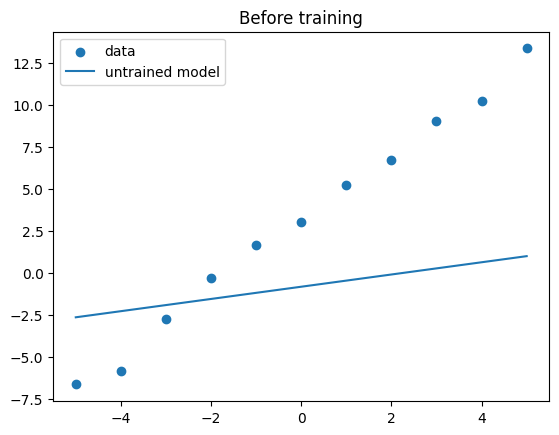

In [21]:
plt.figure()
plt.scatter(xs, ys, label="data")
plt.plot(xs, [p.data for p in predict(xs)], label="untrained model")
plt.legend()
plt.title("Before training")
plt.show()

In [22]:
# Training loop
for epoch in range(100):
    y_preds = predict(xs)
    loss = mse_loss(y_preds, ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch} || Loss: {loss.data}")


Epoch: 0 || Loss: 41.33015587156754
Epoch: 1 || Loss: 31.382329326454794
Epoch: 2 || Loss: 24.823737876850902
Epoch: 3 || Loss: 20.441859393817666
Epoch: 4 || Loss: 17.460378655618996
Epoch: 5 || Loss: 15.382164783073122
Epoch: 6 || Loss: 13.888776326068948
Epoch: 7 || Loss: 12.776144065523031
Epoch: 8 || Loss: 11.91340757117369
Epoch: 9 || Loss: 11.216570180355129
Epoch: 10 || Loss: 10.631637782759885
Epoch: 11 || Loss: 10.123827256939434
Epoch: 12 || Loss: 9.670659499192679
Epoch: 13 || Loss: 9.257538606253478
Epoch: 14 || Loss: 8.874922210499163
Epoch: 15 || Loss: 8.516510166304398
Epoch: 16 || Loss: 8.178084994123857
Epoch: 17 || Loss: 7.856769462002699
Epoch: 18 || Loss: 7.5505511470278
Epoch: 19 || Loss: 7.257977875453434
Epoch: 20 || Loss: 6.977962536235031
Epoch: 21 || Loss: 6.709657904162711
Epoch: 22 || Loss: 6.452376279336798
Epoch: 23 || Loss: 6.20553781889645
Epoch: 24 || Loss: 5.9686372411967135
Epoch: 25 || Loss: 5.741222297386478
Epoch: 26 || Loss: 5.522879782799187
Epo

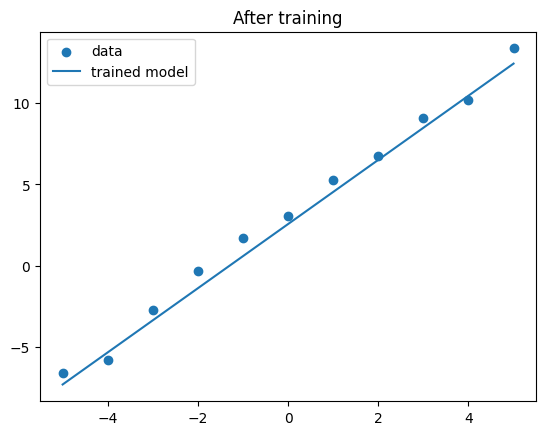

Slope: 1.9754810455323963
Intercept: 2.557216701739091


In [23]:
plt.figure()
plt.scatter(xs, ys, label="data")
plt.plot(xs, [p.data for p in predict(xs)], label="trained model")
plt.legend()
plt.title("After training")
plt.show()
print(f"Slope: {w.data}")
print(f"Intercept: {b.data}")